# Credit card fraud detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\my pc\Desktop\Credit_card_fraud\Credit-Card-Fraud-Detection\dataset\fraudTrain.csv")
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [4]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

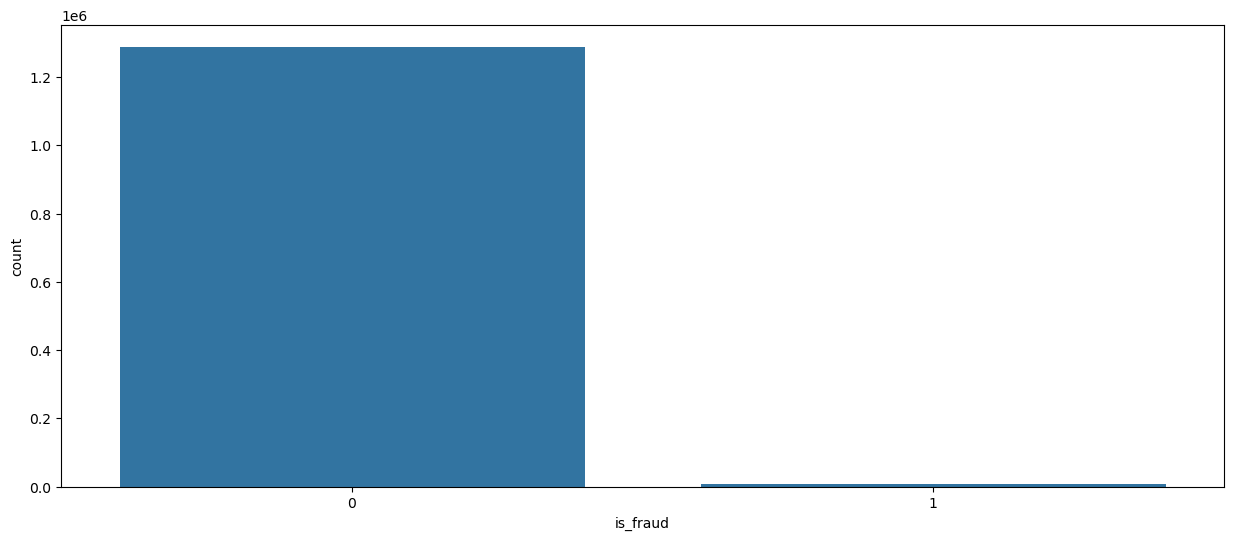

In [6]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='is_fraud')
plt.show()

Imbalance dataset

In [7]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

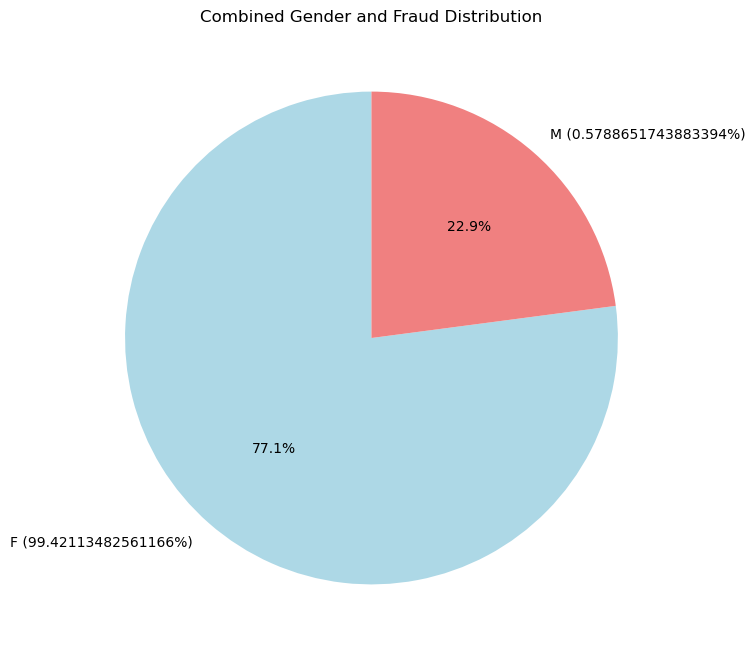

In [8]:
gender_counts=df['gender'].value_counts(normalize=True)*100
is_fraud_counts=df['is_fraud'].value_counts(normalize=True)*100
labels = [f'{gender} ({fraud}%)' for gender, fraud in zip(gender_counts.index, is_fraud_counts)]
sizes = gender_counts.values + is_fraud_counts.values
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral', 'lightgreen', 'lightgray'])
plt.title('Combined Gender and Fraud Distribution')
plt.show()

In [9]:
df=df.drop(columns=["Unnamed: 0",'cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time','amt','lat','long','city_pop'])
df

,merchant,category,gender,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,F,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,F,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,M,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,M,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,M,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,M,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,M,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,M,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,M,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   gender      1296675 non-null  object 
 3   job         1296675 non-null  object 
 4   unix_time   1296675 non-null  int64  
 5   merch_lat   1296675 non-null  float64
 6   merch_long  1296675 non-null  float64
 7   is_fraud    1296675 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 79.1+ MB


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
encoder=LabelEncoder()
df['merchant']=encoder.fit_transform(df['merchant'])
df['category']=encoder.fit_transform(df['category'])
df['job']=encoder.fit_transform(df['job'])
df['gender']=encoder.fit_transform(df['gender'])

In [13]:
df

,merchant,category,gender,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,0,370,1325376018,36.011293,-82.048315,0
1,241,4,0,428,1325376044,49.159047,-118.186462,0
2,390,0,1,307,1325376051,43.150704,-112.154481,0
3,360,2,1,328,1325376076,47.034331,-112.561071,0
4,297,9,1,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...
1296670,499,0,1,215,1371816728,36.841266,-111.690765,0
1296671,2,1,1,360,1371816739,38.906881,-78.246528,0
1296672,599,1,1,308,1371816752,33.619513,-105.130529,0
1296673,509,1,1,485,1371816816,42.788940,-103.241160,0


In [14]:
X=df.drop(columns=['is_fraud'])
y=df['is_fraud']

# Over Sampling

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resample, y_resample = smote.fit_resample(X, y)
y_resample.value_counts()

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.3)

In [18]:
X_train

,merchant,category,gender,job,unix_time,merch_lat,merch_long
1773008,295,11,1,2,1359670862,33.581258,-78.036647
211737,594,11,1,445,1334738608,42.451944,-77.836953
287824,69,6,1,398,1337606420,43.226703,-76.718060
515936,281,8,0,115,1344683108,32.727300,-103.647199
364602,113,5,0,44,1339975986,31.427103,-97.705156
...,...,...,...,...,...,...,...
807364,548,2,0,315,1354786930,33.619336,-94.828595
1074170,651,7,1,473,1363961564,43.640390,-69.997235
313762,553,7,1,0,1338503214,39.836299,-85.173136
1870407,277,11,1,52,1328914303,41.270526,-72.591461


# Model Building

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model=RandomForestClassifier()

In [21]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
acc=accuracy_score(y_test,y_pred)
acc

0.9940762919811454

In [25]:
confusion=confusion_matrix(y_test,y_pred)
confusion

array([[383325,   2947],
       [  1635, 385595]], dtype=int64)

In [26]:
classification=classification_report(y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    386272
           1       0.99      1.00      0.99    387230

    accuracy                           0.99    773502
   macro avg       0.99      0.99      0.99    773502
weighted avg       0.99      0.99      0.99    773502



In [49]:
from joblib import dump

In [50]:
file_path=r'C:\Users\my pc\Desktop\Credit_card_fraud\Credit-Card-Fraud-Detection\model\credit_model.joblib'

In [51]:
dump(model,file_path)

['C:\\Users\\my pc\\Desktop\\Credit_card_fraud\\Credit-Card-Fraud-Detection\\model\\credit_model.joblib']

# Decision Tree

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.3)

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model2=DecisionTreeClassifier()

In [33]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred1=model2.predict(X_test)
y_pred1

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
acc1=accuracy_score(y_test,y_pred1)
acc1

0.9659987950903811

In [36]:
confusion1=confusion_matrix(y_test,y_pred)
confusion1

array([[192611, 194096],
       [192349, 194446]], dtype=int64)

In [37]:
classification1=classification_report(y_test,y_pred)
print(classification1)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50    386707
           1       0.50      0.50      0.50    386795

    accuracy                           0.50    773502
   macro avg       0.50      0.50      0.50    773502
weighted avg       0.50      0.50      0.50    773502



# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
model3=LogisticRegression()

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X_resample,y_resample,test_size=0.3)

In [41]:
model3.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred3=model3.predict(X_test)
y_pred3

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [43]:
acc2=accuracy_score(y_test,y_pred3)
acc2

0.4994169375127666

In [44]:
confusion2=confusion_matrix(y_test,y_pred3)
confusion2

array([[     0, 387202],
       [     0, 386300]], dtype=int64)

In [52]:
df.dtypes

merchant        int32
category        int32
gender          int32
job             int32
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object